In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import shutil

In [12]:
!python --version

Python 3.10.12


In [13]:
source_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/images'
destination_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/spare photos and data/train'

In [14]:
# Function to move non-conforming images
def move_non_conforming_images(source_folder, destination_folder):
    # Ensure the destination directory exists
    os.makedirs(destination_folder, exist_ok=True)

    # Iterate through files in the source folder
    for filename in os.listdir(source_folder):
        # Check if the file is an image
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Check if the filename starts with '0'
            if not filename.startswith('0'):
                # Construct full file paths
                src_file = os.path.join(source_folder, filename)
                dest_file = os.path.join(destination_folder, filename)

                # Move the file
                shutil.move(src_file, dest_file)
                print(f"Moved: {filename}")

In [15]:
move_non_conforming_images(source_folder, destination_folder)

Moved: 164.jpg
Moved: 162.jpg
Moved: 160.jpg
Moved: 156.jpg
Moved: 154.jpg
Moved: 152.jpg
Moved: 148.jpg
Moved: 144.jpg
Moved: 140.jpg
Moved: 138.jpg
Moved: 136.jpg
Moved: 132.jpg
Moved: 128.jpg
Moved: 126.jpg
Moved: 124.jpg
Moved: 122.jpg
Moved: 121.jpg
Moved: 116.jpg
Moved: 223.jpg
Moved: 221.jpg
Moved: 219.jpg
Moved: 215.jpg
Moved: 21.jpg
Moved: 200.jpg
Moved: 208.jpg
Moved: 2.jpg
Moved: 198.jpg
Moved: 196.jpg
Moved: 194.jpg
Moved: 192.jpg
Moved: 186.jpg
Moved: 188.jpg
Moved: 182.jpg
Moved: 176.jpg
Moved: 174.jpg
Moved: 172.jpg
Moved: 170.jpg
Moved: 166.jpg
Moved: 271.jpg
Moved: 269.jpg
Moved: 267.jpg
Moved: 263.jpg
Moved: 261.jpg
Moved: 257.jpg
Moved: 253.jpg
Moved: 25.jpg
Moved: 23.jpg
Moved: 225.jpg
Moved: 23 (1).jpg
Moved: 273.jpg
Moved: 25 (1).jpg
Moved: 253 (1).jpg
Moved: 257 (1).jpg
Moved: 261 (1).jpg
Moved: 263 (1).jpg
Moved: 267 (1).jpg
Moved: 269 (1).jpg
Moved: 271 (1).jpg
Moved: 319.jpg
Moved: 317.jpg
Moved: 313.jpg
Moved: 31.jpg
Moved: 311.jpg
Moved: 307.jpg
Moved: 305.j

In [16]:
def rename_and_move_masks(source_mask_folder, destination_folder):
    # Ensure the destination directory exists
    os.makedirs(destination_folder, exist_ok=True)

    # Iterate through files in the source mask folder
    for filename in os.listdir(source_mask_folder):
        # Check if the file is an image
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Check if the filename does not start with '0'
            if not filename.startswith('0'):
                # Rename the mask file by adding '_mask' before the extension
                new_name = filename.replace('.jpg', '_mask.jpg').replace('.jpeg', '_mask.jpeg').replace('.png', '_mask.png')

                # Construct full file paths
                src_file = os.path.join(source_mask_folder, filename)
                dest_file = os.path.join(destination_folder, new_name)

                # Move the file
                shutil.move(src_file, dest_file)
                print(f"Moved and renamed: {filename} to {new_name}")


source_mask_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/masks'
destination_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/spare photos and data/train'

In [17]:
rename_and_move_masks(source_mask_folder, destination_folder)

Moved and renamed: 134.jpg to 134_mask.jpg
Moved and renamed: 132.jpg to 132_mask.jpg
Moved and renamed: 126.jpg to 126_mask.jpg
Moved and renamed: 128.jpg to 128_mask.jpg
Moved and renamed: 130.jpg to 130_mask.jpg
Moved and renamed: 116.jpg to 116_mask.jpg
Moved and renamed: 122.jpg to 122_mask.jpg
Moved and renamed: 121.jpg to 121_mask.jpg
Moved and renamed: 124.jpg to 124_mask.jpg
Moved and renamed: 176.jpg to 176_mask.jpg
Moved and renamed: 190.jpg to 190_mask.jpg
Moved and renamed: 146.jpg to 146_mask.jpg
Moved and renamed: 138.jpg to 138_mask.jpg
Moved and renamed: 136.jpg to 136_mask.jpg
Moved and renamed: 140.jpg to 140_mask.jpg
Moved and renamed: 142.jpg to 142_mask.jpg
Moved and renamed: 150.jpg to 150_mask.jpg
Moved and renamed: 148.jpg to 148_mask.jpg
Moved and renamed: 154.jpg to 154_mask.jpg
Moved and renamed: 168.jpg to 168_mask.jpg
Moved and renamed: 162.jpg to 162_mask.jpg
Moved and renamed: 160.jpg to 160_mask.jpg
Moved and renamed: 156.jpg to 156_mask.jpg
Moved and r

In [18]:
import random
import cv2
import matplotlib.pyplot as plt

In [19]:
source_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/masks'
spare_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/spare photos and data/train'

In [20]:
def check_for_duplicates_and_display(source_folder, spare_folder):
    # Get list of files in source and spare folders
    source_files = set(os.listdir(source_folder))
    spare_files = set(os.listdir(spare_folder))

    # Find duplicates
    duplicates = source_files & spare_files
    if duplicates:
        print(f"Found duplicates: {duplicates}")
    else:
        print("No duplicates found.")

    # Get list of masks in spare folder
    mask_files = [f for f in spare_files if f.lower().endswith(('_mask.jpg', '_mask.jpeg', '_mask.png'))]

    if mask_files:
        # Select a random mask file
        random_mask_file = random.choice(mask_files)

        # Derive the corresponding X-ray image file name
        xray_file_name = random_mask_file.replace('_mask', '')

        # Construct full paths
        mask_path = os.path.join(spare_folder, random_mask_file)
        xray_path = os.path.join(spare_folder, xray_file_name)

        # Check if corresponding X-ray image exists
        if os.path.exists(xray_path):
            # Read and display the images
            xray_image = cv2.imread(xray_path)
            mask_image = cv2.imread(mask_path)

            # Convert BGR to RGB for display
            xray_image = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)
            mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

            # Plot images
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].imshow(xray_image)
            ax[0].set_title('X-ray Image')
            ax[0].axis('off')

            ax[1].imshow(mask_image)
            ax[1].set_title('Mask Image')
            ax[1].axis('off')

            plt.show()
        else:
            print(f"Corresponding X-ray image not found for mask: {random_mask_file}")
    else:
        print("No masks found in the spare folder.")

No duplicates found.


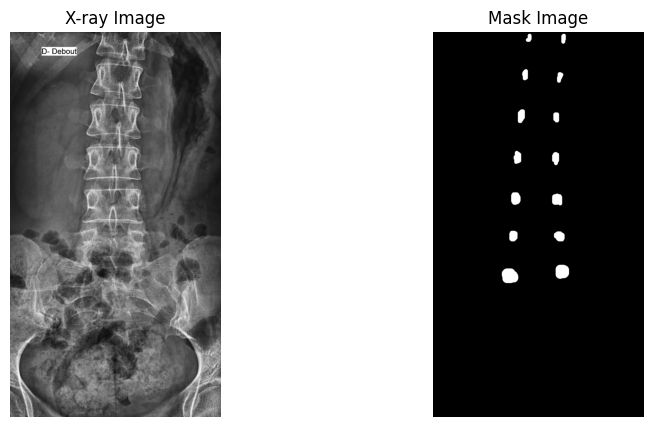

In [23]:
check_for_duplicates_and_display(source_folder, spare_folder)

In [24]:
import re

In [25]:
def merge_and_rename_images_and_masks(images_folder, masks_folder, merged_folder):
    # Ensure the merged directory exists
    os.makedirs(merged_folder, exist_ok=True)

    # Move and rename mask files
    for filename in os.listdir(masks_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Rename the mask file by adding '_mask' before the extension
            new_name = re.sub(r'\.(jpg|jpeg|png)$', r'_mask.\1', filename, flags=re.IGNORECASE)

            # Construct full file paths
            src_file = os.path.join(masks_folder, filename)
            dest_file = os.path.join(merged_folder, new_name)

            # Move the file
            shutil.move(src_file, dest_file)
            print(f"Moved and renamed mask: {filename} to {new_name}")

    # Move image files
    for filename in os.listdir(images_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Construct full file paths
            src_file = os.path.join(images_folder, filename)
            dest_file = os.path.join(merged_folder, filename)

            # Move the file
            shutil.move(src_file, dest_file)
            print(f"Moved image: {filename}")

In [26]:
images_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/images'
masks_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/masks'
merged_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/merged'

merge_and_rename_images_and_masks(images_folder, masks_folder, merged_folder)

Moved and renamed mask: 0112-F-064Y0.jpg to 0112-F-064Y0_mask.jpg
Moved and renamed mask: 0107-F-033Y0.jpg to 0107-F-033Y0_mask.jpg
Moved and renamed mask: 0106-F-016Y0.jpg to 0106-F-016Y0_mask.jpg
Moved and renamed mask: 0105-F-009Y0.jpg to 0105-F-009Y0_mask.jpg
Moved and renamed mask: 0102-F-013Y0.jpg to 0102-F-013Y0_mask.jpg
Moved and renamed mask: 0100-M-051Y0.jpg to 0100-M-051Y0_mask.jpg
Moved and renamed mask: 0101-F-022Y0.jpg to 0101-F-022Y0_mask.jpg
Moved and renamed mask: 0097-F-040Y0.jpg to 0097-F-040Y0_mask.jpg
Moved and renamed mask: 0095-F-020Y0.jpg to 0095-F-020Y0_mask.jpg
Moved and renamed mask: 0098-F-065Y0.jpg to 0098-F-065Y0_mask.jpg
Moved and renamed mask: 0104-F-013Y0.jpg to 0104-F-013Y0_mask.jpg
Moved and renamed mask: 0090-F-016Y0.jpg to 0090-F-016Y0_mask.jpg
Moved and renamed mask: 0068-F-017Y0.jpg to 0068-F-017Y0_mask.jpg
Moved and renamed mask: 0062-F-041Y0.jpg to 0062-F-041Y0_mask.jpg
Moved and renamed mask: 0059-F-028Y0.jpg to 0059-F-028Y0_mask.jpg
Moved and 

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
import pandas as pd

images_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/merged'
masks_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/merged'
csv_path = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/metadata.csv'

def generate_metadata(images_folder, masks_folder, csv_path):
    # List to store metadata
    metadata = []

    # Iterate through the images folder
    for filename in os.listdir(images_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')) and not filename.lower().endswith('_mask.jpg'):
            # Extract metadata from filename
            parts = filename.split('-')
            patient_id = parts[0]
            gender = parts[1]
            age = parts[2][:3]
            view_type = 'AP' if parts[2][3] == '0' else 'LA'  # Correcting this line to check for the last character

            # Construct full file paths
            image_path = os.path.join(images_folder, filename)
            mask_filename = filename.replace('.jpg', '_mask.jpg').replace('.jpeg', '_mask.jpeg').replace('.png', '_mask.png')
            mask_path = os.path.join(masks_folder, mask_filename)

            if os.path.exists(mask_path):
                # Append metadata to the list
                metadata.append([patient_id, gender, age, view_type, image_path, mask_path])



    # Create a DataFrame from the metadata
    df = pd.DataFrame(metadata, columns=['Patient_ID', 'Gender', 'Age', 'View_Type', 'Image_Path', 'Mask_Path'])

    # Save the DataFrame to a CSV file
    df.to_csv(csv_path, index=False)
    print(f"Metadata CSV file saved to {csv_path}")

# CSV file generated
generate_metadata(images_folder, masks_folder, csv_path)

Metadata CSV file saved to /content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/metadata.csv


In [39]:
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df.head(10))

   Patient_ID Gender  Age View_Type  \
0         145      F   47        LA   
1         144      F   38        LA   
2         142      F   51        LA   
3         141      M   55        LA   
4         140      M   24        LA   
5         138      M   64        LA   
6         126      F   26        LA   
7         121      F   72        LA   
8         118      F   15        LA   
9         109      F   42        LA   

                                          Image_Path  \
0  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
1  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
2  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
3  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
4  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
5  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
6  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
7  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
8  /content/drive/My Drive/INTERNSHIP PROJECTS/da...   
9  /conten

In [ ]:
def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

def normalize_image(image):
    return image / 255.0

def augment_image(image, mask):
    # Apply random rotations, flips, and scaling
    if np.random.rand() > 0.5:
        image = cv2.flip(image, 1)
        mask = cv2.flip(mask, 1)
    if np.random.rand() > 0.5:
        angle = np.random.uniform(-10, 10)
        M = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
        image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
        mask = cv2.warpAffine(mask, M, (mask.shape[1], mask.shape[0]))
    return image, mask

def preprocess_image(image_path, mask_path, size=(256, 256)):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = resize_image(image, size)
    mask = resize_image(mask, size)
    image = normalize_image(image)
    mask = normalize_image(mask)
    image, mask = augment_image(image, mask)
    return image, mask

def preprocess_dataset(images_folder, masks_folder, size=(256, 256)):
    images = []
    masks = []
    for filename in os.listdir(images_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')) and not filename.endswith('_mask.jpg'):
            image_path = os.path.join(images_folder, filename)
            mask_path = os.path.join(masks_folder, filename.replace('.jpg', '_mask.jpg').replace('.jpeg', '_mask.jpeg').replace('.png', '_mask.png'))
            if os.path.exists(mask_path):
                image, mask = preprocess_image(image_path, mask_path, size)
                images.append(image)
                masks.append(mask)
    return np.array(images), np.array(masks)

# Defining paths
images_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/merged'
masks_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/dataSPINE/train/merged'

# Preprocessing dataset
images, masks = preprocess_dataset(images_folder, masks_folder)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, masks, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)
